Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Import data file.
The original raw data has been cleaned and aggregated previously

In [ ]:
df_agg = pd.read_csv('aggregated_data.csv')
df_agg

Drop LastInvoiceDate as unneeded going forward

In [ ]:
df_agg = df_agg.drop('LastInvoiceDate', axis=1)
df_agg

Log transform the data

In [ ]:
selected_columns = ['MonetaryValue', 'Frequency', 'Recency']
df_agg_log = df_agg[selected_columns].copy()

df_agg_log['MonetaryValue'] = np.log1p(df_agg_log['MonetaryValue'])
df_agg_log['Frequency'] = np.log1p(df_agg_log['Frequency'])
df_agg_log['Recency'] = np.log1p(df_agg_log['Recency'])

Plot the transformed data

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df_agg_log['MonetaryValue'], df_agg_log['Frequency'], df_agg_log['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3-D Scatterplot of log Transformed Data')

Normalize the data by scaling it to see if the scaling improves the data distribution.

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_agg_log[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

Return the resulting numpy array to pandas in a df

In [ ]:
df_agg_log_scaled = pd.DataFrame(scaled_data, index=df_agg_log.index, 
                                 columns=('MonetaryValue', 'Frequency', 'Recency'))

df_agg_log_scaled

3-D Plt the Transformed and Scaled data

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df_agg_log_scaled['MonetaryValue'], df_agg_log_scaled['Frequency'], df_agg_log_scaled['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3-D Scatterplot of log Transformed and MinMax Scaled Data')

Data is prepared for clustering using KMetoids

In [ ]:
df_metoids = df_agg_log_scaled.copy()
df_metoids

Run df through range of cluters to develop silhouette scores to determine optimum number of clusters.
Plot the results

In [ ]:
X = df_metoids[['MonetaryValue', 'Frequency', 'Recency']]

silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_labels = kmedoids.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Medoids')
plt.show()

Silhouette scoring indicates 4 clusters is the optimal number

In [ ]:
X = df_metoids[['MonetaryValue', 'Frequency', 'Recency']]
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)
cluster_labels = kmedoids.labels_
df_metoids['Cluster'] = cluster_labels
df_metoids

In [ ]:
cluster_colors = {0: '#1f77b4', # Blue
                  1: '#ff7f0e', # Orange
                  2: '#2ca02c', # Green
                  3: '#d62728', # Red
                  }

colors = df_metoids['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_metoids['MonetaryValue'],
                     df_metoids['Frequency'],
                     df_metoids['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3-D Scatterplot Customer Data by Cluster(k): KMedoids')

plt.show()

Vioin Plot of the Clusters

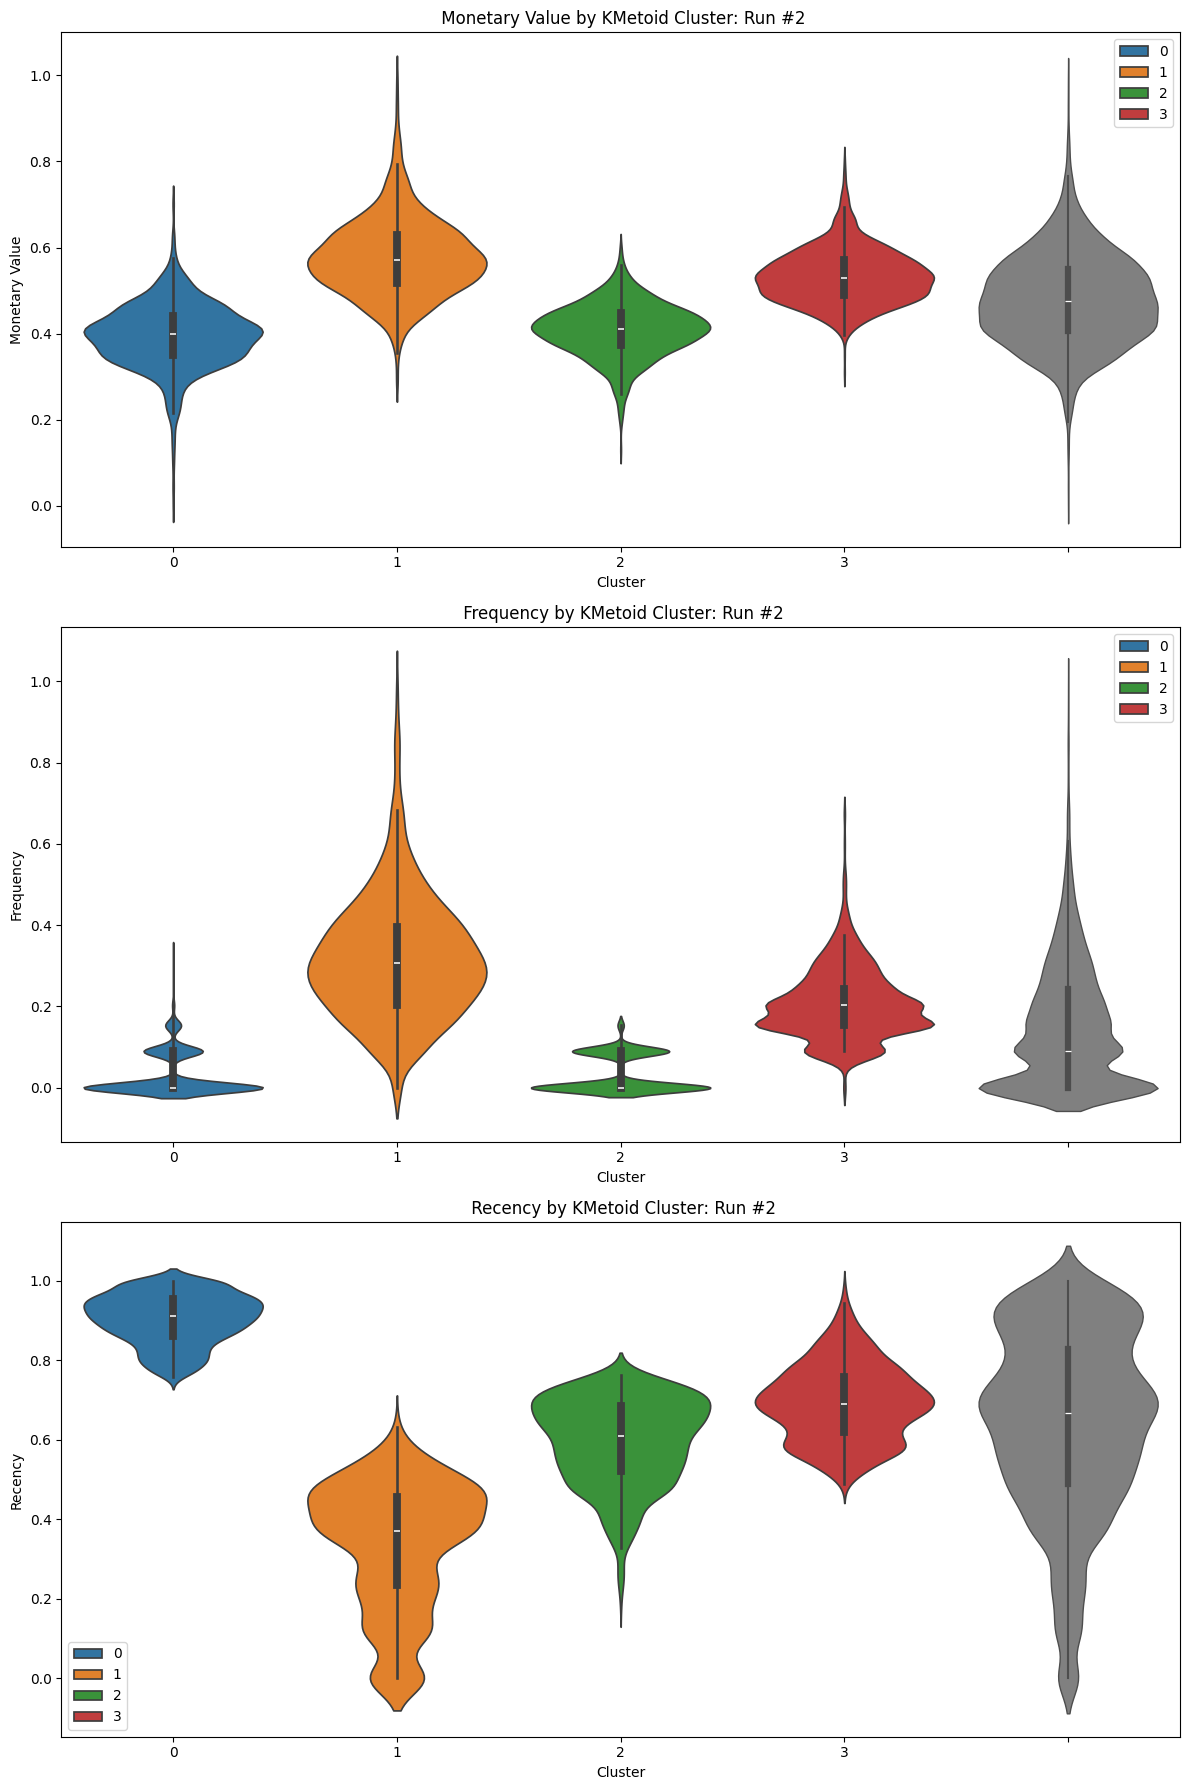

In [25]:
fig = plt.figure(figsize=(12, 18))

plt.subplot( 3, 1, 1)
sns.violinplot(x=df_metoids['Cluster'], y=df_metoids['MonetaryValue'], palette=cluster_colors,
               hue=df_metoids['Cluster'])
sns.violinplot(y=df_metoids['MonetaryValue'], color='gray', linewidth=1.0)
plt.title(' Monetary Value by KMetoid Cluster: Run #2')
plt.ylabel('Monetary Value')

plt.subplot( 3, 1, 2)
sns.violinplot(x=df_metoids['Cluster'], y=df_metoids['Frequency'], palette=cluster_colors,
               hue=df_metoids['Cluster'])
sns.violinplot(y=df_metoids['Frequency'], color='gray', linewidth=1.0)
plt.title(' Frequency by KMetoid Cluster: Run #2')
plt.ylabel('Frequency')

plt.subplot( 3, 1, 3)
sns.violinplot(x=df_metoids['Cluster'], y=df_metoids['Recency'], palette=cluster_colors,
               hue=df_metoids['Cluster'])
sns.violinplot(y=df_metoids['Recency'], color='gray', linewidth=1.0)
plt.title(' Recency by KMetoid Cluster: Run #2')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()